# Problem Set #4 - Michael 

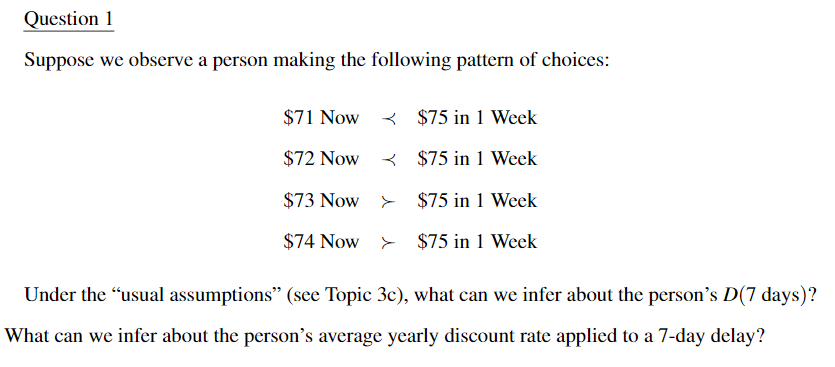

<!-- Usual assumptions: Loss aversion, diminishing sensitivity, relativity to gains -->
If we go through the descisions:
$$
D(0)= 1
D(7)>\frac{v(72)}{v(75)}\\
D(7)<\frac{v(73)}{v(75)}\\
$$
So $D(7)$ is between $.96$ and $.9733$.

This yields $\rho = 52/7 (-\ln(.97))=22.6\%$

<!-- 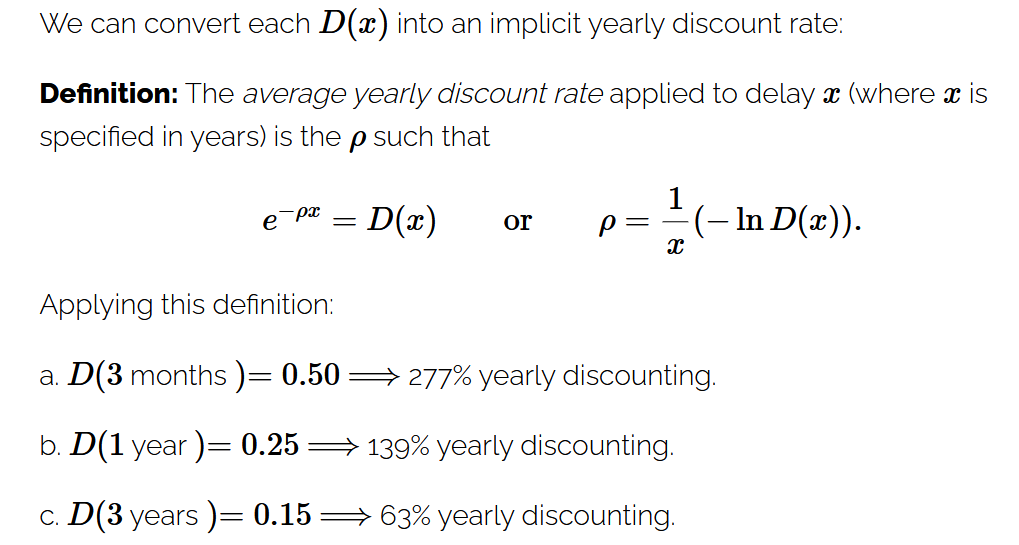 -->

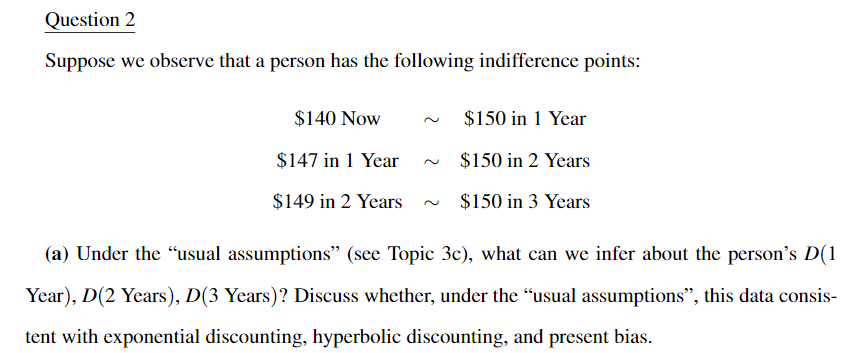